In [89]:
from pyspark.sql import SparkSession

In [90]:
spark=SparkSession.builder.appName("Spark_data_processing").getOrCreate()

In [91]:
df_1=spark.read.csv("/Users/hp/Downloads/adult.csv",header=True,inferSchema=True)
df_2=spark.read.csv("/Users/hp/Downloads/adult_test.csv",header=True,inferSchema=True)

In [92]:
df=df_1.union(df_2)

In [93]:
df.show(5)

+---+-----------------+------+----------+---+-------------------+------------------+--------------+------+-------+----+---+---+--------------+------+
|  0|                1|     2|         3|  4|                  5|                 6|             7|     8|      9|  10| 11| 12|            13|    14|
+---+-----------------+------+----------+---+-------------------+------------------+--------------+------+-------+----+---+---+--------------+------+
| 39|        State-gov| 77516| Bachelors| 13|      Never-married|      Adm-clerical| Not-in-family| White|   Male|2174|  0| 40| United-States| <=50K|
| 50| Self-emp-not-inc| 83311| Bachelors| 13| Married-civ-spouse|   Exec-managerial|       Husband| White|   Male|   0|  0| 13| United-States| <=50K|
| 38|          Private|215646|   HS-grad|  9|           Divorced| Handlers-cleaners| Not-in-family| White|   Male|   0|  0| 40| United-States| <=50K|
| 53|          Private|234721|      11th|  7| Married-civ-spouse| Handlers-cleaners|       Husband| 

In [94]:
rows=df.count()
columns=len(df.columns)
print(f"shape: ({rows}, {columns})")

shape: (48842, 15)


In [95]:
from pyspark.sql.functions import col, count, when

In [96]:
df.describe().show()

+-------+------------------+------------+------------------+-------------+------------------+---------+-----------------+--------+-------------------+-------+------------------+-----------------+------------------+-----------+------+
|summary|                 0|           1|                 2|            3|                 4|        5|                6|       7|                  8|      9|                10|               11|                12|         13|    14|
+-------+------------------+------------+------------------+-------------+------------------+---------+-----------------+--------+-------------------+-------+------------------+-----------------+------------------+-----------+------+
|  count|             48842|       48842|             48842|        48842|             48842|    48842|            48842|   48842|              48842|  48842|             48842|            48842|             48842|      48842| 48842|
|   mean| 38.64358543876172|        NULL|189664.13459727284|    

In [97]:
missing_values=df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
print("missing values per column")
missing_values.show()

missing values per column
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|  0|  1|  2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [98]:
zero_counts=df.select([count(when(col(c) == 0, c)).alias(c) for c in df.columns if df.schema[c].dataType.simpleString() in ["int", "double"]])
print("count of zeros per column: ")
zero_counts.show()

count of zeros per column: 
+---+---+---+-----+-----+---+
|  0|  2|  4|   10|   11| 12|
+---+---+---+-----+-----+---+
|  0|  0|  0|44807|46560|  0|
+---+---+---+-----+-----+---+



<span style="color:olive;">Cleaning/Preprocessing 1 (giving appropriate labels to columns)</span>

In [99]:
df=df.toDF("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income")

In [100]:
df.show(5)

+---+-----------------+------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
|age|        workclass|fnlwgt| education|education-num|     marital-status|        occupation|  relationship|  race|    sex|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+-----------------+------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
| 39|        State-gov| 77516| Bachelors|           13|      Never-married|      Adm-clerical| Not-in-family| White|   Male|        2174|           0|            40| United-States| <=50K|
| 50| Self-emp-not-inc| 83311| Bachelors|           13| Married-civ-spouse|   Exec-managerial|       Husband| White|   Male|           0|           0|            13| United-States| <=50K|
| 38|          Private|215646|   HS-grad|            9|     

In [101]:
zero_counts=df.select([count(when(col(c) == 0, c)).alias(c) for c in df.columns if df.schema[c].dataType.simpleString() in ["int", "double"]])
print("count of zeros per column: ")
zero_counts.show()

count of zeros per column: 
+---+------+-------------+------------+------------+--------------+
|age|fnlwgt|education-num|capital-gain|capital-loss|hours-per-week|
+---+------+-------------+------------+------------+--------------+
|  0|     0|            0|       44807|       46560|             0|
+---+------+-------------+------------+------------+--------------+



In [102]:
print("data types of columns:")
for column, dtype in df.dtypes:
    print(f"{column}: {dtype}")

data types of columns:
age: int
workclass: string
fnlwgt: int
education: string
education-num: int
marital-status: string
occupation: string
relationship: string
race: string
sex: string
capital-gain: int
capital-loss: int
hours-per-week: int
native-country: string
income: string


<span style="color:olive;">Cleaning/Preprocessing 2 (dropping columns)</span>

In [103]:
df=df.drop("capital-gain", "capital-loss")

In [104]:
columns1=["age", "workclass", "fnlwgt", "education", "education-num"]

for i in columns1:
    print(f"Unique values in column '{i}':")
    df.select(i).distinct().show(truncate=False)

Unique values in column 'age':
+---+
|age|
+---+
|31 |
|85 |
|65 |
|53 |
|78 |
|34 |
|81 |
|28 |
|76 |
|27 |
|26 |
|44 |
|22 |
|47 |
|52 |
|86 |
|40 |
|20 |
|57 |
|54 |
+---+
only showing top 20 rows

Unique values in column 'workclass':
+-----------------+
|workclass        |
+-----------------+
| State-gov       |
| Federal-gov     |
| Self-emp-not-inc|
| Local-gov       |
| Private         |
| ?               |
| Self-emp-inc    |
| Without-pay     |
| Never-worked    |
+-----------------+

Unique values in column 'fnlwgt':
+------+
|fnlwgt|
+------+
|276515|
|29054 |
|304030|
|190174|
|190387|
|113000|
|188488|
|256866|
|170846|
|131811|
|188834|
|29814 |
|206351|
|210736|
|83861 |
|243476|
|63574 |
|282680|
|230478|
|296738|
+------+
only showing top 20 rows

Unique values in column 'education':
+-------------+
|education    |
+-------------+
| Prof-school |
| 10th        |
| 7th-8th     |
| 5th-6th     |
| Assoc-acdm  |
| Assoc-voc   |
| Masters     |
| 12th        |
| Preschool 

In [105]:
columns2=["marital-status", "occupation", "relationship", "race", "sex"]
for i in columns2:
    print(f"Unique values in column '{i}':")
    df.select(i).distinct().show(truncate=False)

Unique values in column 'marital-status':
+----------------------+
|marital-status        |
+----------------------+
| Widowed              |
| Married-spouse-absent|
| Married-AF-spouse    |
| Married-civ-spouse   |
| Divorced             |
| Never-married        |
| Separated            |
+----------------------+

Unique values in column 'occupation':
+------------------+
|occupation        |
+------------------+
| Farming-fishing  |
| Handlers-cleaners|
| Prof-specialty   |
| Adm-clerical     |
| Exec-managerial  |
| Craft-repair     |
| Sales            |
| ?                |
| Tech-support     |
| Transport-moving |
| Protective-serv  |
| Armed-Forces     |
| Machine-op-inspct|
| Other-service    |
| Priv-house-serv  |
+------------------+

Unique values in column 'relationship':
+---------------+
|relationship   |
+---------------+
| Husband       |
| Own-child     |
| Not-in-family |
| Other-relative|
| Wife          |
| Unmarried     |
+---------------+

Unique values in column

In [106]:
columns3=["hours-per-week", "native-country", "income"]
for i in columns3:
    print(f"Unique values in column '{i}':")
    df.select(i).distinct().show(truncate=False)

Unique values in column 'hours-per-week':
+--------------+
|hours-per-week|
+--------------+
|31            |
|85            |
|65            |
|53            |
|78            |
|34            |
|81            |
|28            |
|76            |
|26            |
|27            |
|44            |
|12            |
|91            |
|22            |
|47            |
|1             |
|52            |
|13            |
|16            |
+--------------+
only showing top 20 rows

Unique values in column 'native-country':
+-------------------+
|native-country     |
+-------------------+
| Dominican-Republic|
| Ireland           |
| Cuba              |
| Guatemala         |
| Iran              |
| Taiwan            |
| El-Salvador       |
| United-States     |
| South             |
| Japan             |
| Nicaragua         |
| Canada            |
| Cambodia          |
| Laos              |
| Germany           |
| Trinadad&Tobago   |
| Peru              |
| Ecuador           |
| Yugoslavia        

In [107]:
from pyspark.sql.functions import trim,col, when, count, expr

<span style="color:olive;">Cleaning/Preprocessing 3 (removing space in columns)</span>

In [108]:
for col_name, col_type in df.dtypes:
    if col_type=="string":
        df=df.withColumn(col_name, trim(col(col_name)))


<span style="color:olive;">Cleaning/Preprocessing 4 (checking for ? in columns to replcae with new value)</span>

In [109]:
workclass_quemark=df.filter(col("workclass")=="?").count()
print(workclass_quemark)
occupation_quemark=df.filter(col("occupation")=="?").count()
print(occupation_quemark)
native_country_quemark=df.filter(col("native-country")=="?").count()
print(native_country_quemark)

2799
2809
857


In [110]:
df=df.filter(col("native-country") != "?")

In [111]:
df.show(5)

+---+----------------+------+---------+-------------+------------------+-----------------+-------------+-----+------+--------------+--------------+------+
|age|       workclass|fnlwgt|education|education-num|    marital-status|       occupation| relationship| race|   sex|hours-per-week|native-country|income|
+---+----------------+------+---------+-------------+------------------+-----------------+-------------+-----+------+--------------+--------------+------+
| 39|       State-gov| 77516|Bachelors|           13|     Never-married|     Adm-clerical|Not-in-family|White|  Male|            40| United-States| <=50K|
| 50|Self-emp-not-inc| 83311|Bachelors|           13|Married-civ-spouse|  Exec-managerial|      Husband|White|  Male|            13| United-States| <=50K|
| 38|         Private|215646|  HS-grad|            9|          Divorced|Handlers-cleaners|Not-in-family|White|  Male|            40| United-States| <=50K|
| 53|         Private|234721|     11th|            7|Married-civ-spous

In [112]:
mode_workclass=df.groupBy("workclass").count().orderBy(col("count").desc()).first()["workclass"]
df=df.withColumn("workclass",when(col("workclass") == "?", mode_workclass).otherwise(col("workclass")))

mode_occupation = df.groupBy("occupation").count().orderBy(col("count").desc()).first()["occupation"]
df=df.withColumn("occupation",when(col("occupation") == "?", mode_occupation).otherwise(col("occupation")))

<span style="color:olive;">Cleaning/Preprocessing 5 (column datatype conversion and check)</span>

In [113]:
columns_numerical=["age", "fnlwgt", "education-num", "hours-per-week"]

for i in columns_numerical:
    df=df.withColumn(i, col(i).cast("double"))

df.printSchema()

root
 |-- age: double (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: double (nullable = true)
 |-- education: string (nullable = true)
 |-- education-num: double (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hours-per-week: double (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)



In [114]:
from pyspark.sql.functions import isnan, regexp_replace, lower

In [115]:
missing_val=df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns])
missing_val.show()

+---+---------+------+---------+-------------+--------------+----------+------------+----+---+--------------+--------------+------+
|age|workclass|fnlwgt|education|education-num|marital-status|occupation|relationship|race|sex|hours-per-week|native-country|income|
+---+---------+------+---------+-------------+--------------+----------+------------+----+---+--------------+--------------+------+
|  0|        0|     0|        0|            0|             0|         0|           0|   0|  0|             0|             0|     0|
+---+---------+------+---------+-------------+--------------+----------+------------+----+---+--------------+--------------+------+



<span style="color:olive;">Cleaning/Preprocessing 6 (dropping duplicates if any)</span>

In [116]:
df=df.dropDuplicates()

In [117]:
rows=df.count()
columns=len(df.columns)
print(f"shape: ({rows}, {columns})")

shape: (47955, 13)


<span style="color:olive;">Cleaning/Preprocessing 3 (replacing - to space)</span>

In [118]:
for col_name, col_type in df.dtypes:
    if col_type=="string":
        df=df.withColumn(col_name, regexp_replace(col(col_name), "-", " "))

<span style="color:olive;">Cleaning/Preprocessing 7 (converting string to lower to ensure equal type of alphabets)</span>

In [119]:
for col_name, col_type in df.dtypes:
    if col_type=="string":
        df=df.withColumn(col_name, lower(col(col_name)))

In [120]:
from pyspark.sql.functions import min, max

In [121]:
min_values=df.agg(*[min(col_name).alias(col_name) for col_name in df.columns])
print("minimum values:")
min_values.show()

max_values=df.agg(*[max(col_name).alias(col_name) for col_name in df.columns])
print("maximum values:")
max_values.show()

minimum values:
+----+-----------+-------+---------+-------------+--------------+------------+------------+------------------+------+--------------+--------------+------+
| age|  workclass| fnlwgt|education|education-num|marital-status|  occupation|relationship|              race|   sex|hours-per-week|native-country|income|
+----+-----------+-------+---------+-------------+--------------+------------+------------+------------------+------+--------------+--------------+------+
|17.0|federal gov|12285.0|     10th|          1.0|      divorced|adm clerical|     husband|amer indian eskimo|female|           1.0|      cambodia| <=50k|
+----+-----------+-------+---------+-------------+--------------+------------+------------+------------------+------+--------------+--------------+------+

maximum values:
+----+-----------+---------+------------+-------------+--------------+----------------+------------+-----+----+--------------+--------------+------+
| age|  workclass|   fnlwgt|   education|ed

<span style="color:olive;">Cleaning/Preprocessing 3 (removing . from income column)</span>

In [122]:
df=df.withColumn(
    "income",
    when(col("income")=="<=50k.", "<=50k")
    .when(col("income")==">50k.", ">50k")
    .otherwise(col("income")))

<span style="color:olive;">Cleaning/Preprocessing 8 (binning of skewed columns)</span>

In [123]:
df=df.withColumn(
    "age_group",
    when(col("age") <= 25, "young")
    .when((col("age") > 25) & (col("age") <= 50), "middle aged")
    .when((col("age") > 50) & (col("age") <= 75), "senior")
    .otherwise("elder"))

df=df.withColumn(
    "hours-per-week-cat",
    when(col("hours-per-week") <= 20, "less")
    .when((col("hours-per-week") > 20) & (col("hours-per-week") <= 40), "ideal")
    .when((col("hours-per-week") > 40) & (col("hours-per-week") <= 60), "more")
    .otherwise("extreme"))

df=df.withColumn(
    "education-num-cat",
    when(col("education-num") <= 2, "basic")
    .when((col("education-num") > 2) & (col("education-num") <= 5), "lower")
    .when((col("education-num") > 5) & (col("education-num") <= 8), "intermediate")
    .when((col("education-num") > 8) & (col("education-num") <= 11), "higher")
    .otherwise("very high"))

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [125]:
pandas_df=df.toPandas()

In [126]:
from pyspark.sql.functions import col, mean, stddev, abs
import numpy as np

In [127]:
for col_name in columns_numerical:
    stats_df=df.select(
        mean(col_name).alias("mean"), stddev(col_name).alias("stddev")
    ).collect()
    mean_val=stats_df[0]["mean"]
    stddev_val=stats_df[0]["stddev"]
    z_score_col=((col(col_name) - mean_val) / stddev_val)
    outliers=df.withColumn("z_score", z_score_col).filter(abs(col("z_score")) > 3)
    
    print(f"outliers for {col_name}: {outliers.count()}")

outliers for age: 180
outliers for fnlwgt: 493
outliers for education-num: 319
outliers for hours-per-week: 668


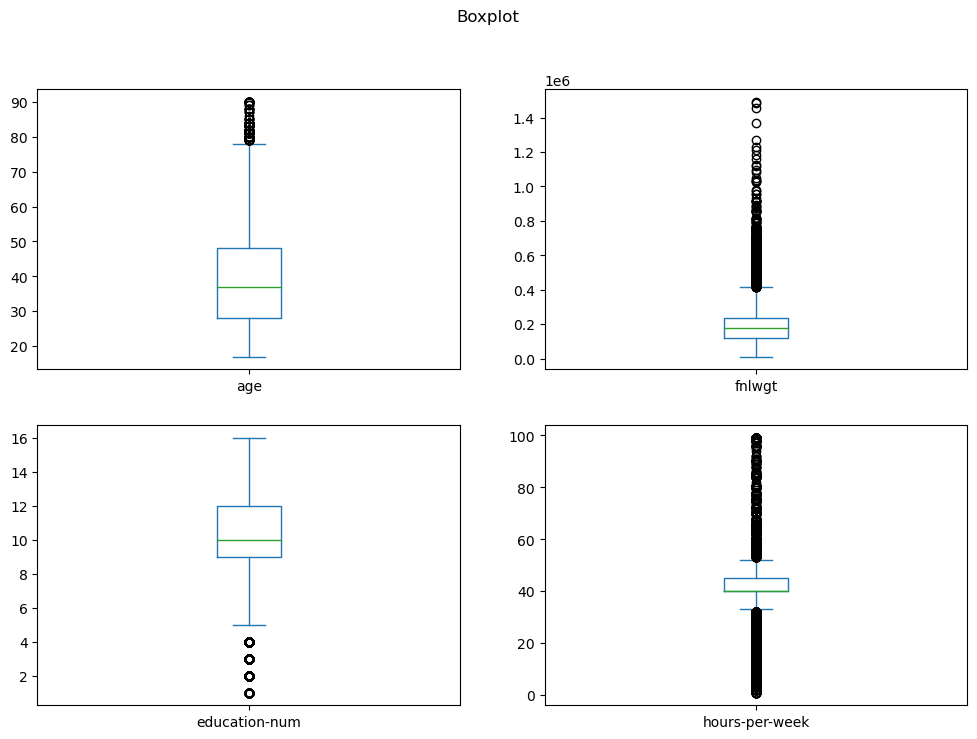

In [128]:
pandas_df=df.select(columns_numerical).toPandas()

pandas_df.plot(kind="box", subplots=True, layout=(2, 2), figsize=(12, 8), sharex=False, sharey=False)
plt.suptitle("Boxplot")
plt.show()

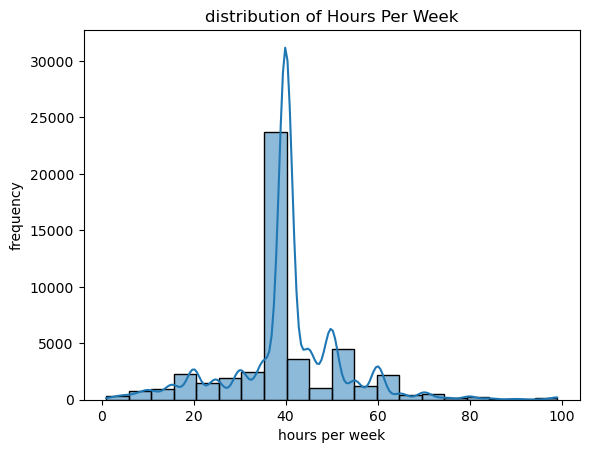

In [129]:
pandas_df=df.select("hours-per-week").toPandas()

sns.histplot(data=pandas_df, x="hours-per-week", kde=True, bins=20)
plt.title("distribution of Hours Per Week")
plt.xlabel("hours per week")
plt.ylabel("frequency")
plt.show()

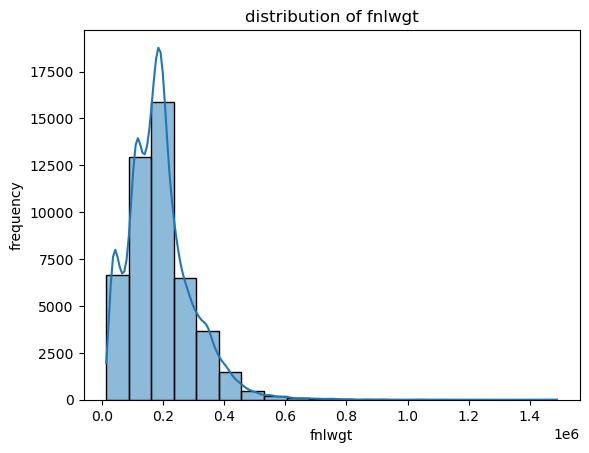

In [130]:
pandas_df=df.select("fnlwgt").toPandas()

sns.histplot(data=pandas_df, x="fnlwgt", kde=True, bins=20)
plt.title("distribution of fnlwgt")
plt.xlabel("fnlwgt")
plt.ylabel("frequency")
plt.show()

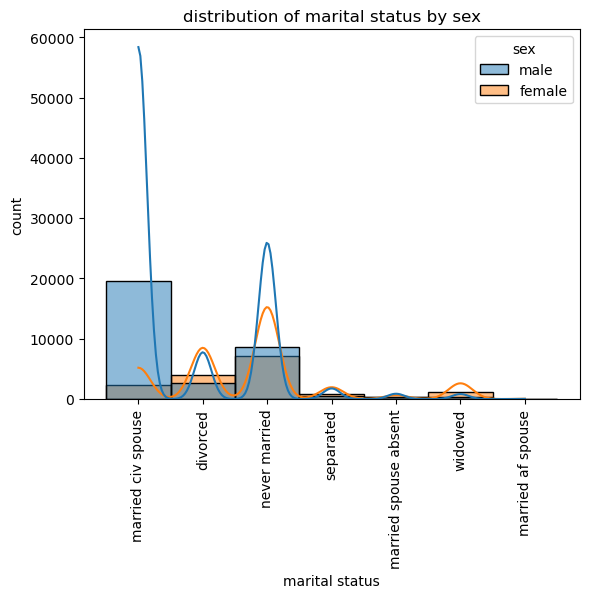

In [131]:
pandas_df=df.select("marital-status", "sex").toPandas()

sns.histplot(data=pandas_df, x="marital-status", hue="sex", kde=True)
plt.title("distribution of marital status by sex")
plt.xlabel("marital status")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

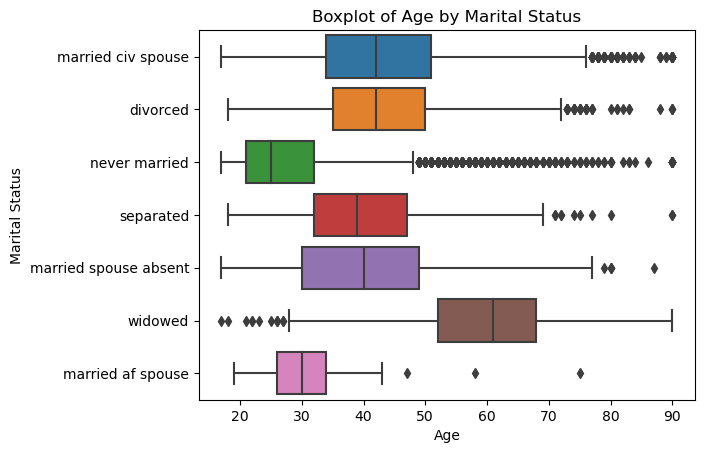

In [132]:
pandas_df=df.select("age", "marital-status").toPandas()
sns.boxplot(x="age", y="marital-status", data=pandas_df)
plt.title("Boxplot of Age by Marital Status")
plt.xlabel("Age")
plt.ylabel("Marital Status")
plt.show()

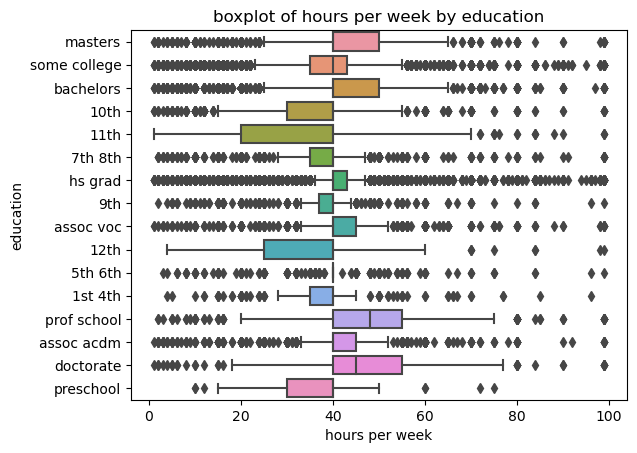

In [133]:
pandas_df=df.select("hours-per-week", "education").toPandas()
sns.boxplot(x="hours-per-week", y="education", data=pandas_df)
plt.title("boxplot of hours per week by education")
plt.xlabel("hours per week")
plt.ylabel("education")
plt.show()

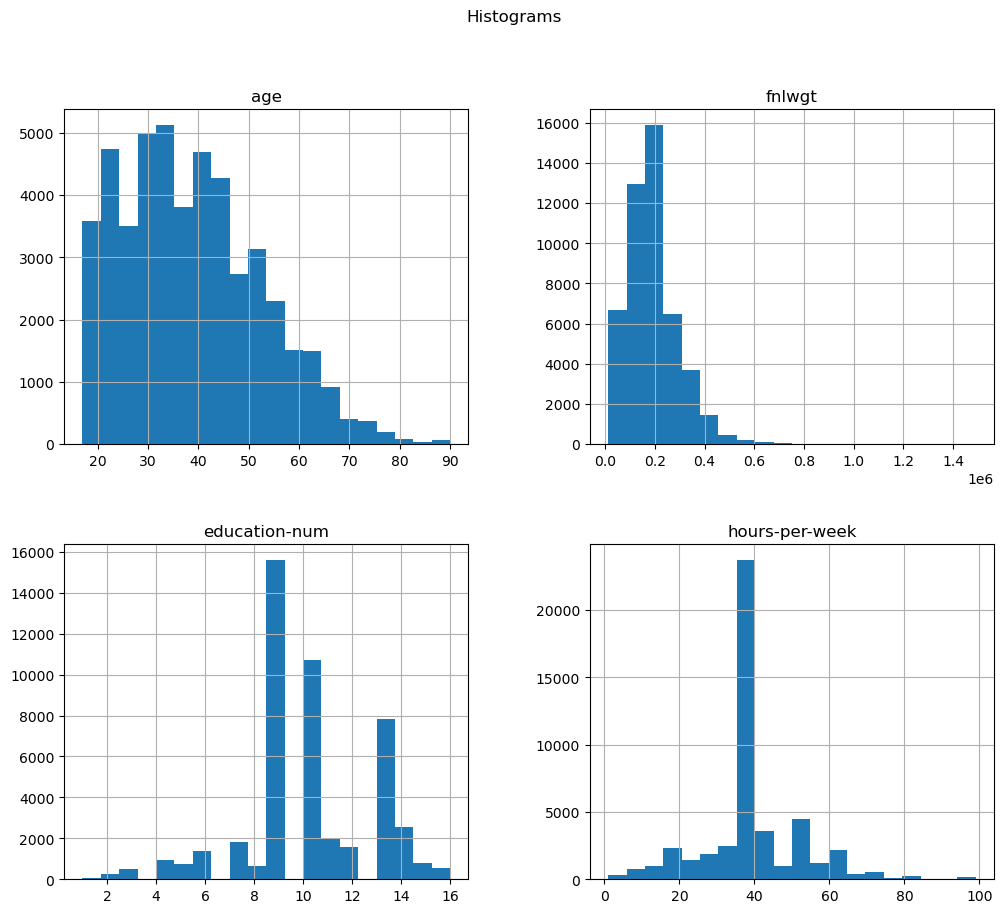

In [134]:
pandas_df=df.select(columns_numerical).toPandas()
pandas_df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms")
plt.show()

<span style="color:olive;">Cleaning/Preprocessing 9 (handling outliers)</span>

In [135]:
for col_name in columns_numerical:
    stats=df.select(mean(col_name).alias("mean"), stddev(col_name).alias("stddev")).collect()
    mean_val=stats[0]["mean"]
    stddev_val=stats[0]["stddev"]
    
    lower_bound=mean_val-(3 * stddev_val)
    upper_bound=mean_val+(3 * stddev_val)
    
    df=df.filter((col(col_name) >= lower_bound) & (col(col_name) <= upper_bound))

In [136]:
from pyspark.sql.functions import log1p

In [137]:
df=df.withColumn("fnlwgt_log", log1p(col("fnlwgt")))

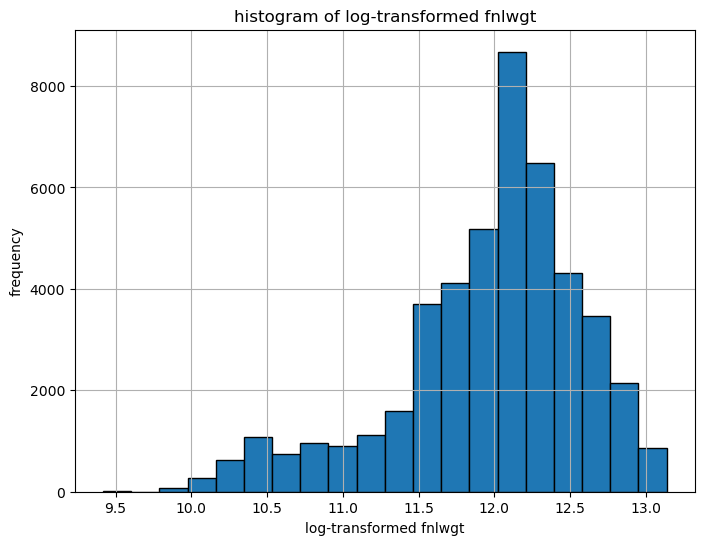

In [138]:
pandas_df=df.select("fnlwgt_log").toPandas()
plt.figure(figsize=(8, 6))
pandas_df["fnlwgt_log"].hist(bins=20, edgecolor='black')
plt.title("histogram of log-transformed fnlwgt")
plt.xlabel("log-transformed fnlwgt")
plt.ylabel("frequency")
plt.show()

In [139]:
from scipy.stats import chi2_contingency
import pandas as pd

In [140]:
pandas_df=df.select("age_group", "income").toPandas()
contingency=pd.crosstab(pandas_df["age_group"], pandas_df["income"])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"degrees of Freedom: {dof}")
print("expected frequencies:")
print(expected)

chi-square statistic: 3241.556883307942
p-value: 0.0
degrees of Freedom: 3
expected frequencies:
[[  130.72430613    41.27569387]
 [21246.49987051  6708.50012949]
 [ 6780.94336772  2141.05663228]
 [ 7056.83245565  2228.16754435]]


In [141]:
pandas_df=df.select("income", "education").toPandas()
contingency=pd.crosstab(pandas_df["income"], pandas_df["education"])
chi2, p, dof, expected=chi2_contingency(contingency)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 6199.074677541751
P-value: 0.0
Degrees of Freedom: 13
Expected frequencies:
[[ 1001.71299694  1334.60396253   469.69547201   357.97179177
    665.02190616   550.25812578  1168.15847973  1513.2098459
   5799.75104675   408.13344412 11509.05911426  1906.90281435
    576.09897699  7954.4220227 ]
 [  316.28700306   421.39603747   148.30452799   113.02820823
    209.97809384   173.74187422   368.84152027   477.7901541
   1831.24895325   128.86655588  3633.94088574   602.09718565
    181.90102301  2511.5779773 ]]


In [142]:
pandas_df=df.select("income", "fnlwgt").toPandas()
contingency=pd.crosstab(pandas_df["income"], pandas_df["fnlwgt"])
chi2, p, dof, expected=chi2_contingency(contingency)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 29295.34361315696
P-value: 5.728178104345718e-18
Degrees of Freedom: 27249
Expected frequencies:
[[0.76002504 2.28007511 0.76002504 ... 1.52005007 0.76002504 0.76002504]
 [0.23997496 0.71992489 0.23997496 ... 0.47994993 0.23997496 0.23997496]]


In [143]:
for col_name, dtype in df.dtypes:
    print(f"{col_name}: {dtype}")

age: double
workclass: string
fnlwgt: double
education: string
education-num: double
marital-status: string
occupation: string
relationship: string
race: string
sex: string
hours-per-week: double
native-country: string
income: string
age_group: string
hours-per-week-cat: string
education-num-cat: string
fnlwgt_log: double


In [144]:
relationship_cnt=df.groupBy("relationship").count()
relationship_cnt.show()

+--------------+-----+
|  relationship|count|
+--------------+-----+
|          wife| 2219|
|     unmarried| 4894|
|other relative| 1388|
| not in family|11899|
|       husband|18618|
|     own child| 7316|
+--------------+-----+



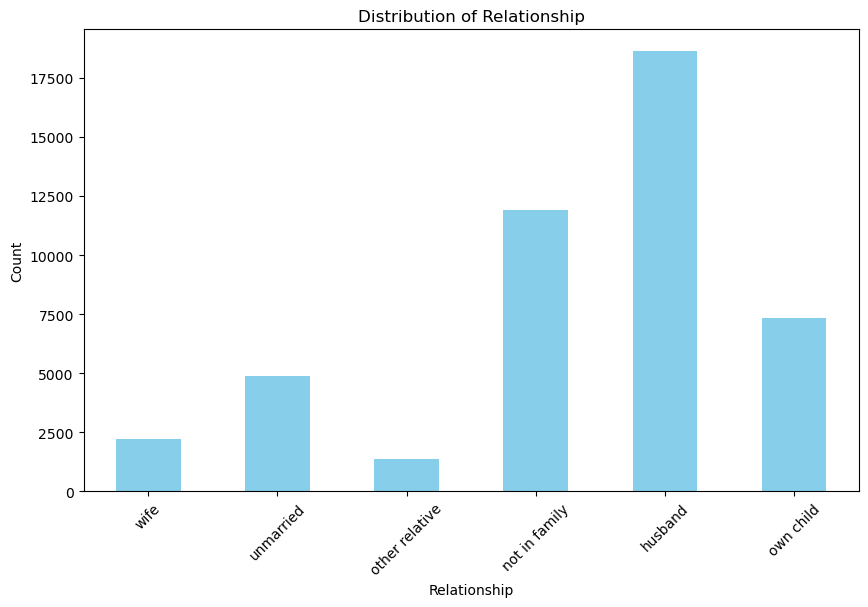

In [145]:
pandas_cnt=relationship_cnt.toPandas()
pandas_cnt.set_index("relationship")["count"].plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Distribution of Relationship")
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [146]:
df=df.withColumn("relationship", when(col("relationship").isin(["unmarried", "wife", "other relative", "own child"]), "others").otherwise(col("relationship")))
df.select("relationship").show(5)

+-------------+
| relationship|
+-------------+
|      husband|
|      husband|
|       others|
|       others|
|not in family|
+-------------+
only showing top 5 rows



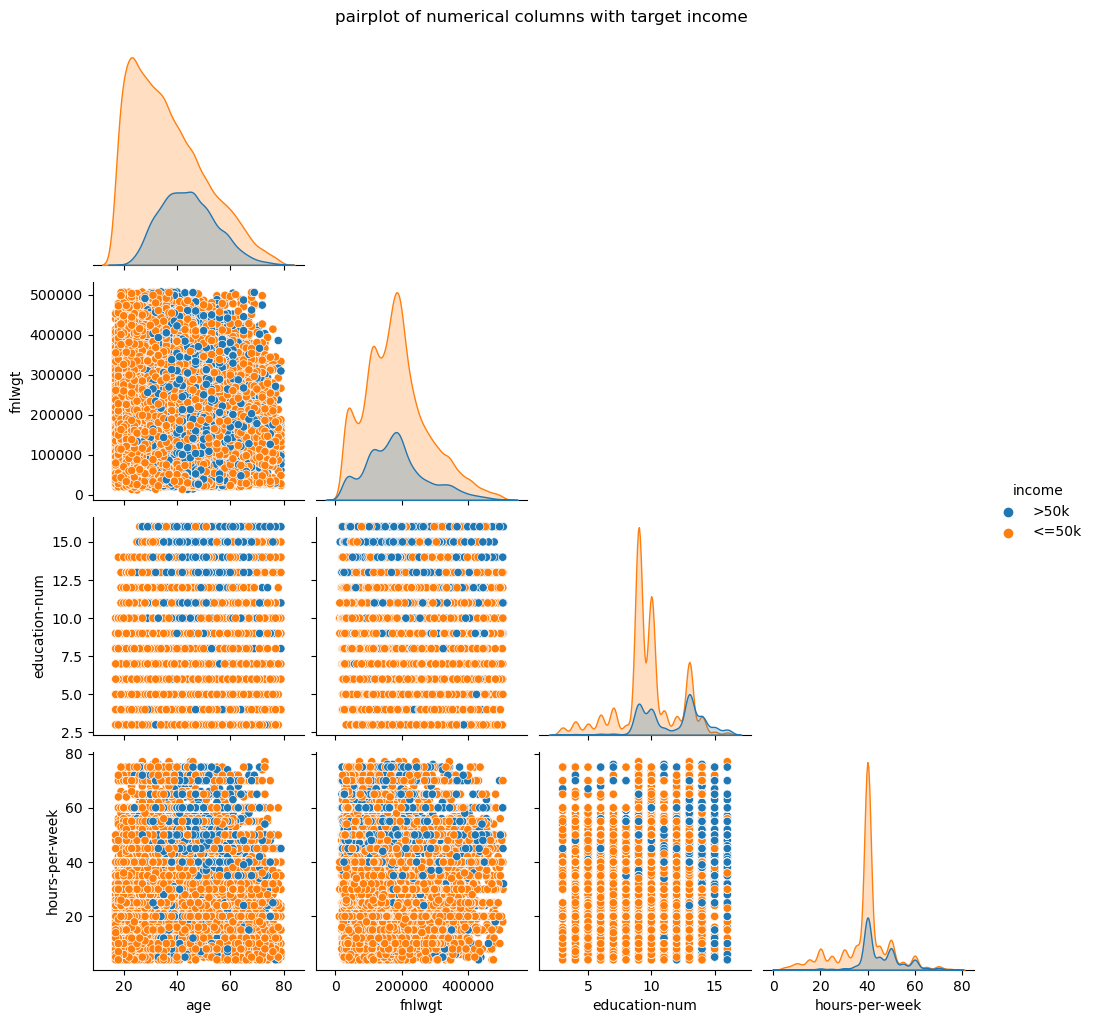

In [147]:
columns_tmp=columns_numerical+["income"]
pandas_df = df.select(columns_tmp).toPandas()

sns.pairplot(pandas_df, hue="income", diag_kind="kde", corner=True)
plt.suptitle("pairplot of numerical columns with target income", y=1.02)
plt.show()

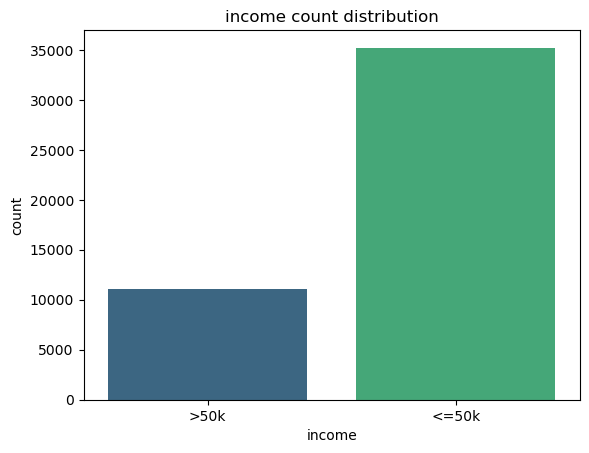

In [148]:
pandas_df=df.select("income").toPandas()
sns.countplot(x="income", data=pandas_df, palette="viridis")
plt.title("income count distribution")
plt.xlabel("income")
plt.ylabel("count")
plt.show()

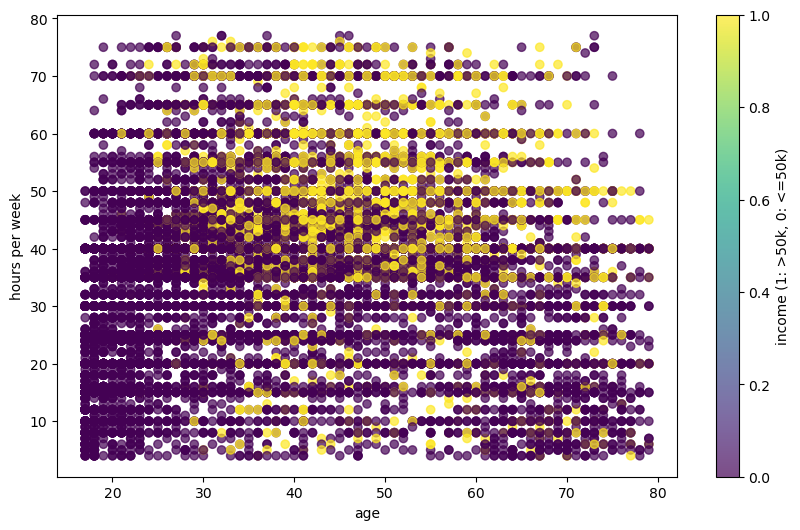

In [149]:
pandas_df=df.select("age", "hours-per-week", "income").toPandas()
pandas_df["income_color"]=pandas_df["income"].apply(lambda x: 1 if x == ">50k" else 0)
plt.figure(figsize=(10, 6))
scatter=plt.scatter(pandas_df["age"], pandas_df["hours-per-week"], c=pandas_df["income_color"], cmap="viridis", alpha=0.7)
plt.xlabel("age")
plt.ylabel("hours per week")
plt.colorbar(scatter, label="income (1: >50k, 0: <=50k)")
plt.show()

In [150]:
from scipy.stats import probplot

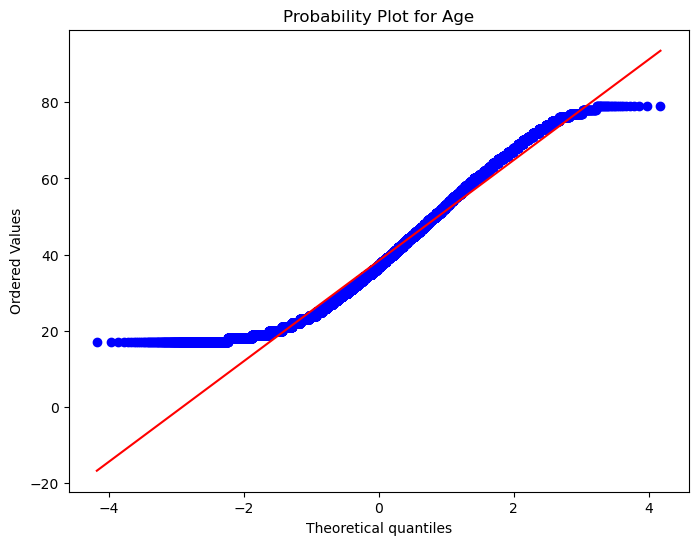

In [151]:
pandas_df=df.select("age").toPandas()
fig, ax=plt.subplots(figsize=(8, 6))
res=probplot(pandas_df["age"], dist="norm", plot=ax)
plt.title("Probability Plot for Age")
plt.show()

In [152]:
from scipy.stats import f_oneway

In [153]:
pandas_df=df.select("income", "hours-per-week").toPandas()
g1=pandas_df[pandas_df["income"] == "<=50k"]["hours-per-week"]
g2=pandas_df[pandas_df["income"] == ">50k"]["hours-per-week"]
f_stat, p_value=f_oneway(g1, g2)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 2873.3998665173126
P-value: 0.0


In [154]:
pandas_df=df.select("income", "age").toPandas()
g1=pandas_df[pandas_df["income"] == "<=50k"]["age"]
g2=pandas_df[pandas_df["income"] == ">50k"]["age"]
f_stat, p_value=f_oneway(g1, g2)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 2903.976305555358
P-value: 0.0


In [155]:
df.show(5)

+----+---------+--------+------------+-------------+------------------+---------------+-------------+------------------+------+--------------+--------------+------+-----------+------------------+-----------------+------------------+
| age|workclass|  fnlwgt|   education|education-num|    marital-status|     occupation| relationship|              race|   sex|hours-per-week|native-country|income|  age_group|hours-per-week-cat|education-num-cat|        fnlwgt_log|
+----+---------+--------+------------+-------------+------------------+---------------+-------------+------------------+------+--------------+--------------+------+-----------+------------------+-----------------+------------------+
|41.0|  private|445382.0|     masters|         14.0|married civ spouse|exec managerial|      husband|             white|  male|          65.0| united states|  >50k|middle aged|           extreme|        very high|13.006689865138059|
|34.0|  private|117529.0|some college|         10.0|married civ spou

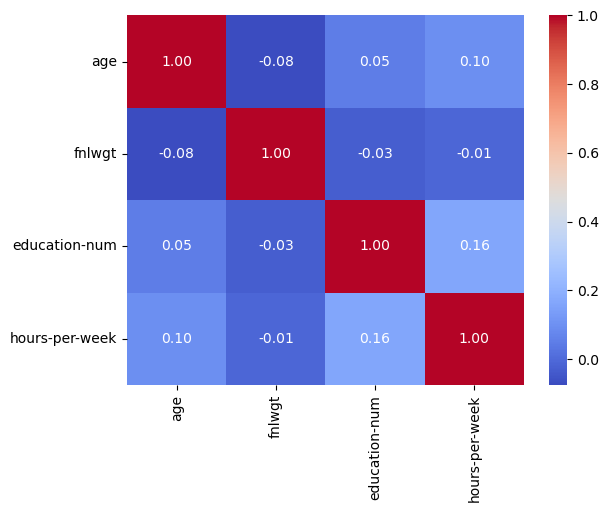

In [156]:
correlation_matrix=[]
for col1 in columns_numerical:
    row=[]
    for col2 in columns_numerical:
        corr=df.stat.corr(col1, col2)
        row.append(corr)
    correlation_matrix.append(row)
correlation_df=pd.DataFrame(correlation_matrix, columns=columns_numerical, index=columns_numerical)
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [157]:
columns_to_drop=["fnlwgt", "fnlwgt_log", "education-num", "education", "hours-per-week", "age"]
df=df.drop(*columns_to_drop)
df.printSchema()
df.show(5)

root
 |-- workclass: string (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)
 |-- age_group: string (nullable = false)
 |-- hours-per-week-cat: string (nullable = false)
 |-- education-num-cat: string (nullable = false)

+---------+------------------+---------------+-------------+------------------+------+--------------+------+-----------+------------------+-----------------+
|workclass|    marital-status|     occupation| relationship|              race|   sex|native-country|income|  age_group|hours-per-week-cat|education-num-cat|
+---------+------------------+---------------+-------------+------------------+------+--------------+------+-----------+------------------+-----------------+
|  private|married civ spouse|exec managerial|   

In [158]:
df.select("workclass").distinct().show()

+----------------+
|       workclass|
+----------------+
|     without pay|
|     federal gov|
|    never worked|
|       local gov|
|         private|
|    self emp inc|
|       state gov|
|self emp not inc|
+----------------+



<span style="color:olive;">Cleaning/Preprocessing 10 (label encoding)</span>

In [159]:
from pyspark.ml.feature import StringIndexer

In [160]:
columns_ordinal=["workclass", "income", "age_group", "hours-per-week-cat", "education-num-cat"]

for col_name in columns_ordinal:
    indexer=StringIndexer(inputCol=col_name, outputCol=f"{col_name}_index")
    df=indexer.fit(df).transform(df)
for col_name in columns_ordinal:
    df=df.drop(col_name).withColumnRenamed(f"{col_name}_index", col_name)
    df=df.withColumn(col_name, col(col_name).cast("int"))
df.show(5)


+------------------+---------------+-------------+------------------+------+--------------+---------+------+---------+------------------+-----------------+
|    marital-status|     occupation| relationship|              race|   sex|native-country|workclass|income|age_group|hours-per-week-cat|education-num-cat|
+------------------+---------------+-------------+------------------+------+--------------+---------+------+---------+------------------+-----------------+
|married civ spouse|exec managerial|      husband|             white|  male| united states|        0|     1|        0|                 3|                1|
|married civ spouse|farming fishing|      husband|             white|  male|        mexico|        0|     0|        0|                 1|                0|
|married civ spouse|exec managerial|       others|             white|female| united states|        0|     0|        0|                 0|                0|
|          divorced|   adm clerical|       others|amer indian es

In [161]:
df.select("workclass").distinct().show()

+---------+
|workclass|
+---------+
|        1|
|        6|
|        3|
|        5|
|        4|
|        7|
|        2|
|        0|
+---------+



In [162]:
native_country_cnt=df.groupBy("native-country").count()
native_country_cnt.orderBy("count", ascending=False).show()

+------------------+-----+
|    native-country|count|
+------------------+-----+
|     united states|42530|
|            mexico|  785|
|       philippines|  282|
|           germany|  205|
|            canada|  179|
|       puerto rico|  174|
|             india|  148|
|              cuba|  131|
|       el salvador|  127|
|           england|  122|
|             china|  118|
|             south|  109|
|           jamaica|  104|
|             italy|   97|
|dominican republic|   89|
|             japan|   87|
|            poland|   85|
|           vietnam|   81|
|          columbia|   79|
|         guatemala|   73|
+------------------+-----+
only showing top 20 rows



<span style="color:olive;">Cleaning/Preprocessing 11 (capping extreme values)</span>

In [163]:
df=df.withColumn("native-country", when(col("native-country") == "united states", "usa").otherwise("others"))
df.select("native-country").show(5)

+--------------+
|native-country|
+--------------+
|           usa|
|        others|
|           usa|
|           usa|
|           usa|
+--------------+
only showing top 5 rows



In [164]:
sex_counts=df.groupBy("sex").count()
sex_counts.orderBy("count", ascending=False).show()

+------+-----+
|   sex|count|
+------+-----+
|  male|30827|
|female|15507|
+------+-----+



In [165]:
race_counts=df.groupBy("race").count()
race_counts.orderBy("count", ascending=False).show()

+------------------+-----+
|              race|count|
+------------------+-----+
|             white|39847|
|             black| 4326|
|asian pac islander| 1343|
|amer indian eskimo|  454|
|             other|  364|
+------------------+-----+



In [166]:
df=df.withColumn("race", when(col("race") == "white", "white").otherwise("others"))
df.select("race").show(5)

+------+
|  race|
+------+
| white|
| white|
| white|
|others|
| white|
+------+
only showing top 5 rows



In [167]:
occupation_counts=df.groupBy("occupation").count()
occupation_counts.orderBy("count", ascending=False).show()

+-----------------+-----+
|       occupation|count|
+-----------------+-----+
|     craft repair| 8441|
|   prof specialty| 5835|
|  exec managerial| 5815|
|     adm clerical| 5436|
|            sales| 5273|
|    other service| 4608|
|machine op inspct| 2875|
| transport moving| 2209|
|handlers cleaners| 1978|
|     tech support| 1392|
|  farming fishing| 1312|
|  protective serv|  941|
|  priv house serv|  205|
|     armed forces|   14|
+-----------------+-----+



In [168]:
df=df.withColumn(
    "occupation",
    when(col("occupation").isin(
        ["other service","machine op inspct","transport moving","handlers cleaners","tech support","farming fishing","protective serv","priv house serv","armed forces","sales"]), 
         "others").otherwise(col("occupation")))
df.select("occupation").show(5)

+---------------+
|     occupation|
+---------------+
|exec managerial|
|         others|
|exec managerial|
|   adm clerical|
|         others|
+---------------+
only showing top 5 rows



In [169]:
marital_status_cnt=df.groupBy("marital-status").count()
marital_status_cnt.orderBy("count", ascending=False).show()

+--------------------+-----+
|      marital-status|count|
+--------------------+-----+
|  married civ spouse|21143|
|       never married|15374|
|            divorced| 6398|
|           separated| 1453|
|             widowed| 1379|
|married spouse ab...|  554|
|   married af spouse|   33|
+--------------------+-----+



In [170]:
df=df.withColumn(
    "marital-status",
    when(col("marital-status").isin(
        ["divorced","separated","widowed","married spouse absent","married af spouse"]), 
        "others").otherwise(col("marital-status")))
df.select("marital-status").show(5)

+------------------+
|    marital-status|
+------------------+
|married civ spouse|
|married civ spouse|
|married civ spouse|
|            others|
|     never married|
+------------------+
only showing top 5 rows



In [171]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline

In [172]:
categorical_columns=["occupation", "relationship", "race", "sex", "native-country", "marital-status"]
for col_name in categorical_columns:
    df.select(col_name).distinct().show()


+---------------+
|     occupation|
+---------------+
|exec managerial|
|         others|
|   craft repair|
|   adm clerical|
| prof specialty|
+---------------+

+-------------+
| relationship|
+-------------+
|       others|
|not in family|
|      husband|
+-------------+

+------+
|  race|
+------+
| white|
|others|
+------+

+------+
|   sex|
+------+
|female|
|  male|
+------+

+--------------+
|native-country|
+--------------+
|        others|
|           usa|
+--------------+

+------------------+
|    marital-status|
+------------------+
|     never married|
|married civ spouse|
|            others|
+------------------+



<span style="color:olive;">Cleaning/Preprocessing 10 (one hot encoding)</span>

In [173]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, IntegerType

In [174]:
columns_to_encode=["occupation", "relationship", "race", "sex", "native-country", "marital-status"]

stages=[]
for col_name in columns_to_encode:
    indexer=StringIndexer(inputCol=col_name, outputCol=f"{col_name}_index")
    
    encoder=OneHotEncoder(inputCol=f"{col_name}_index", outputCol=f"{col_name}_encoded", dropLast=True)
    stages+=[indexer, encoder]

pipeline=Pipeline(stages=stages)
df_transformed=pipeline.fit(df).transform(df)

def vector_to_array(vec):
    return [int(x) for x in vec.toArray()]

vector_to_array_udf=udf(vector_to_array, ArrayType(IntegerType()))

for col_name in columns_to_encode:
    encoded_col=f"{col_name}_encoded"
    df_transformed=df_transformed.withColumn(f"{col_name}_array", vector_to_array_udf(col(encoded_col)))

    categories=df.select(col_name).distinct().rdd.flatMap(lambda x: x).collect()
    for i, category in enumerate(categories[1:]):
        new_col_name=f"{col_name}_{category.replace(' ', '_')}"
        df_transformed=df_transformed.withColumn(new_col_name, col(f"{col_name}_array")[i])


columns_to_drop=columns_to_encode + [f"{col_name}_index" for col_name in columns_to_encode] + [f"{col_name}_encoded" for col_name in columns_to_encode] + [f"{col_name}_array" for col_name in columns_to_encode]
df_final=df_transformed.drop(*columns_to_drop)


df_final.show(5)

+---------+------+---------+------------------+-----------------+-----------------+-----------------------+-----------------------+-------------------------+--------------------------+--------------------+-----------+--------+------------------+---------------------------------+---------------------+
|workclass|income|age_group|hours-per-week-cat|education-num-cat|occupation_others|occupation_craft_repair|occupation_adm_clerical|occupation_prof_specialty|relationship_not_in_family|relationship_husband|race_others|sex_male|native-country_usa|marital-status_married_civ_spouse|marital-status_others|
+---------+------+---------+------------------+-----------------+-----------------+-----------------------+-----------------------+-------------------------+--------------------------+--------------------+-----------+--------+------------------+---------------------------------+---------------------+
|        0|     1|        0|                 3|                1|                0|           

In [175]:
df_final_single = df_final.coalesce(1)
df_final_single.write.csv("/Users/hp/spark_data.csv", header=True, mode="overwrite")

In [176]:
spark.stop()